In [1]:
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    """calculate the perplexity of a lda-model"""
    # dictionary : {7822:'deferment', 1841:'circuitry',19202:'fabianism'...]
    print ('the info of this ldamodel: \n')
    print ('num of testset: %s; size_dictionary: %s; num of topics: %s'%(len(testset), size_dictionary, num_topics))
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] # store the probablity of topic-word:[(u'business', 0.010020942661849608),(u'family', 0.0088027946271537413)...]
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)
    doc_topics_ist = [] #store the doc-topic tuples:[(0, 0.0006211180124223594),(1, 0.0006211180124223594),...]
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0 # the probablity of the doc
        doc = testset[i]
        doc_word_num = 0 # the num of words in the doc
        for word_id, num in doc:
            prob_word = 0.0 # the probablity of the word 
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic*prob_topic_word
            prob_doc += math.log(prob_word) # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum/testset_word_num) # perplexity = exp(-sum(p(d)/sum(Nd))
    print ("the perplexity of this ldamodel is : %s"%prep)
    return prep

In [2]:
import pandas as pd
import time
from gensim import corpora
import gensim

data1 = pd.read_csv("../data/news_data/data_1.csv", encoding="gbk")
data2 = pd.read_csv("../data/news_data/data_2.csv", encoding="gbk")
data3 = pd.read_csv("../data/news_data/data_3.csv", encoding="gbk")
data4 = pd.read_csv("../data/news_data/data_4.csv", encoding="gbk")

all_data = pd.concat([data1, data2], ignore_index=True)
all_data = pd.concat([all_data, data3], ignore_index=True)
all_data = pd.concat([all_data, data4], ignore_index=True)

all_data["content"] = all_data.apply(lambda x: x["content"].strip().split(" "), axis=1)
texts = all_data["content"].to_list()
print("get all data")

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('corpus.mm', corpus)

get all data


In [6]:
def graph_draw(topic, perplexity):  # 做主题数与困惑度的折线图
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()

In [24]:
import math
nums = list(range(1, 20, 1)) # 主题个数
p=[]
for num in nums:
#     print(f"runing number {num} at {start}")
    lda = gensim.models.ldamodel.LdaModel.load(f'../model/lda_model_iterations/lda_{num}.model')
    corpus = corpora.MmCorpus('corpus.mm')
#     print("corpus:",corpus)
#     print("corpus.num_docs:",corpus.num_docs)
    testset = []
    for c in range(int(corpus.num_docs/100)):  # 如何抽取训练集
#         print(corpus[c*5])
        testset.append(corpus[c*100])
#     print(testset)
    prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), num)
    p.append(prep)



the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 1
the perplexity of this ldamodel is : 386.5846941475361
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 2
the perplexity of this ldamodel is : 350.2530429192672
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 3
the perplexity of this ldamodel is : 333.5151173335526
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 4
the perplexity of this ldamodel is : 322.30715669608713
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 5
the perplexity of this ldamodel is : 317.11924791073494
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 6
the perplexity of this ldamodel is : 319.9417643317121
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 7
the perplexity of this l

FileNotFoundError: [Errno 2] No such file or directory: '../model/lda_model_iterations/lda_10.model'

ValueError: x and y must have same first dimension, but have shapes (50,) and (10,)

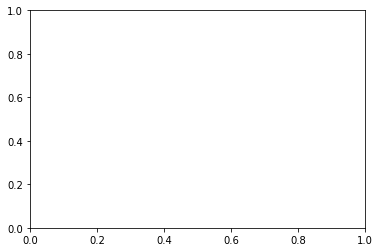

In [23]:
import matplotlib.pyplot as plt
graph_draw(nums,p)

In [22]:
iterations = list(range(50, 501, 50)) # 主题个数
p=[]
for iteration in iterations:
#     print(f"runing number {num} at {start}")
    lda = gensim.models.ldamodel.LdaModel.load(f'../model/lda_model_iterations/lda_{iteration}.model')
    corpus = corpora.MmCorpus('corpus.mm')
#     print("corpus:",corpus)
#     print("corpus.num_docs:",corpus.num_docs)
    testset = []
    for c in range(int(corpus.num_docs/100)):  # 如何抽取训练集
#         print(corpus[c*5])
        testset.append(corpus[c*100])
#     print(testset)
    prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), 8)
    p.append(prep)

the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 312.8981016811189
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 319.9869020933801
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 320.36438618345966
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 328.19658400641634
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 327.08511085460157
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this ldamodel is : 329.5402750592791
the info of this ldamodel: 

num of testset: 906; size_dictionary: 379686; num of topics: 8
the perplexity of this 